# Contour Detection
* Contours detection is a process can be explained simply as a curve joining all the continuous points (along with the boundary), having same colour or intensity. The contours are a useful tool for shape analysis and object detection and recognition

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

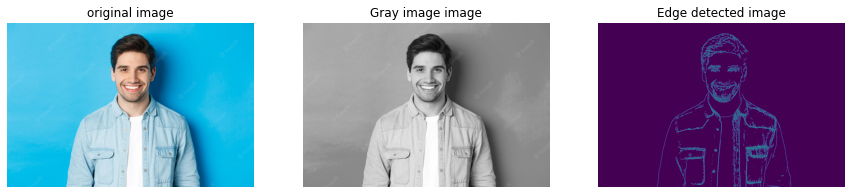

In [3]:
image = cv2.imread("Images/person.webp")  # Read the image
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Canny = cv2.Canny(image, 125,175) #identifing the edges of images using canny cascade

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray image image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(Canny)
plt.title("Edge detected image")
plt.axis('off')

plt.show()

### Finding the contour's
* cv2.findContours() methode used to find the contours it returns the list of contours and hierarchies 
* When pass the image to contour methode it looks of the structure of element(image) and returns two values, Contours which is python List of all contours co-ordinates ind in the image and hierarchies refers to hierarcal respresentation of contours 
* contor Mode for find the contours :-
    1. cv2.RETR_TREE --> used to find only gierarachies contour's in the image
    2. cv2.RETR_EXTERNAL -->used to find only external contour's in the image
    3. cv2.RETR_LIST --> used to find all contour's in the image
* Contour approximation methode --> cv2.CHAIN_APPOROX_NONE it  is how we want to appoximate the contour NONE does nothing it returns  all contours'. or cv2.CHAIN_APPOROX_SIMPLE ---> which essential compresses all contours in the image 
* Example :- if a line in a image when we use CHAIN_APPOROX_NONE it returns all the points or contours of a line but if we use CHAIN_APPOROX_SIMPLE it returns only two end points actually it takes all the points and compresses it into two  end points only. In this case CHAIN APPOTROX SIMPLE is the best method for finding a line in image because line definds by only by two end points we negelect the intermediate points.
* returned Contours is a python list we find total contours using len() method.

In [8]:
contours, hierarchies = cv2.findContours(Canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
total_contours = len(contours)

print(f"{total_contours} Thse many contours find in canny image and CHAIN_APPROX_SIMPLE methode")

2416 Thse many contours find in canny image and CHAIN_APPROX_SIMPLE methode


In [9]:
contours, hierarchies = cv2.findContours(Canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
total_contours = len(contours)

print(f"{total_contours} Thse many contours find in canny image and CHAIN_APPROX_NONE methode")

2416 Thse many contours find in canny image and CHAIN_APPROX_NONE methode


### Nothing much change in contours so that we try to reduce edges by bluring the image

In [10]:
image = cv2.imread("Images/person.webp")  # Read the image
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_img =  cv2.GaussianBlur(gray_img, (5,5), cv2.BORDER_DEFAULT)
Canny = cv2.Canny(blur_img, 125,175) #identifing the edges of blur image using canny cascade

#finding contors
contours, hierarchies = cv2.findContours(Canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
total_contours = len(contours)
total_contours

127

### When we reduce the edges in image by bluring the image then contors are less
*  Genarally threshold means binarazing the image
* We reduce the contours 

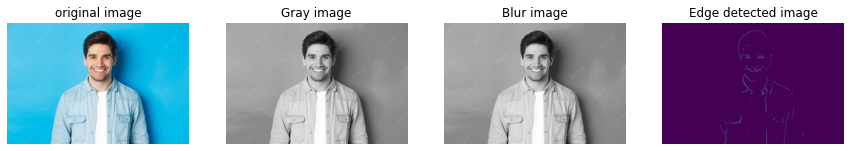

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray image")
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(blur_img, cmap='gray')
plt.title("Blur image")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(Canny)
plt.title("Edge detected image")
plt.axis('off')

plt.show()

### Simple Thresholding
* Here, the matter is straight-forward. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding

* The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values.The third argument is the maximum value which is assigned to pixel values exceeding the threshold.

* OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type cv.THRESH_BINARY.

#### Types of threshold type
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

### Using thresholding technique to find the contours

In [13]:
#pasing the gray image, threshold_value, max_val, type of threshold
# It converts img into 0 to max_value when pickle value below the threshold value it convert into 0 and pickle value is max value
ret, threshold_value = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY) 
#finding contors for threshold image
contors, hierarchies = cv2.findContours(threshold_value, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contors))

991


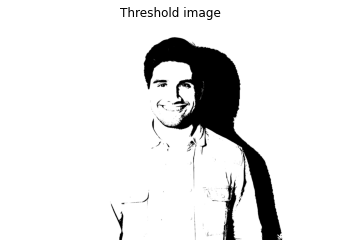

In [16]:
### Displaying the threshold img
plt.imshow(cv2.cvtColor(threshold_value, cv2.COLOR_BGR2RGB))
plt.title("Threshold image")
plt.axis('off')
plt.show()

## Visualize the contors that were found on the image 

In [21]:
img = cv2.imread("Images/person.webp")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blank_img = np.zeros(img.shape, dtype="uint8")
ret, thresh = cv2.threshold(gray_img, 120,255, cv2.THRESH_BINARY)
contours, hierarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#using the drawcontour method to visualize the contor on the blank image
#-1 for all index from contor
contor_img = cv2.drawContours(blank_img, contours, -1, (0,0,255), 2)


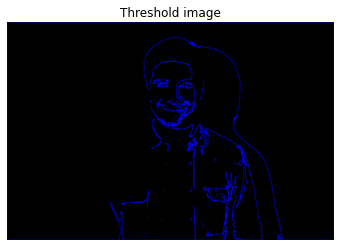

In [22]:
### Displaying the contor image
plt.imshow(contor_img)
plt.title("Contor image")
plt.axis('off')
plt.show()

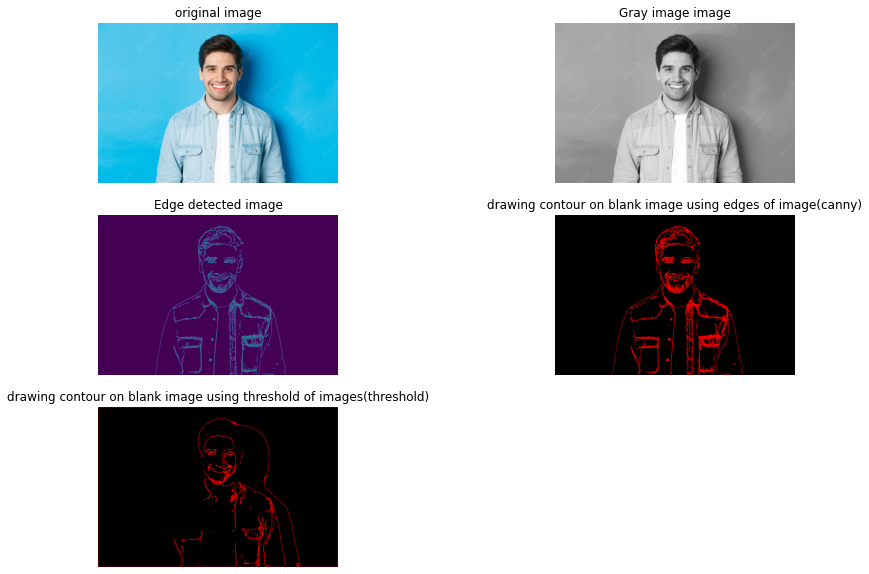

In [29]:
image = cv2.imread("Images/person.webp")  # Read the image
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Canny = cv2.Canny(image, 125,175) #identifing the edges of images using canny cascade
blank_img = np.zeros(img.shape, dtype="uint8")
contours_canny, hierarchies = cv2.findContours(Canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contor_img_canny = cv2.drawContours(blank_img, contours_canny, -1, (0,0,255), 2)

blank_img1 = np.zeros(img.shape, dtype="uint8")
ret, thresh = cv2.threshold(gray_img, 120,255, cv2.THRESH_BINARY)
contours_threshold, hierarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contor_img_threshold = cv2.drawContours(blank_img1, contours_threshold, -1, (0,0,255), 2)


plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original image")
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray image image")
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(Canny)
plt.title("Edge detected image")
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(cv2.cvtColor(contor_img_canny, cv2.COLOR_BGR2RGB))
plt.title("drawing contour on blank image using edges of image(canny)")
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(cv2.cvtColor(contor_img_threshold, cv2.COLOR_BGR2RGB))
plt.title("drawing contour on blank image using threshold of images(threshold)")
plt.axis('off')


plt.show()